<a href="https://colab.research.google.com/github/alexandrufrunza/Sisteme-integrate/blob/main/Curs2_SITC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obiective


*   Seturi de date
*   Batch Gradient Descent
*   Stochastic Gradient Descent
*   Mini-batch Gradient Descent
*   Regresia logistică în PyTorch



# Seturi de date
Acestea sunt utile pentru generarea datelor ce pot fi folosite ulterior. Sunt generate folosind clasa **Dataset**.

In [ ]:
# Importarea librăriilor necesare #

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(50)

In [ ]:
# Generarea unui set de date specifice regresiei liniare

# Definirea clasei specifice
class Data_LR(Dataset):
    def __init__(self):
      self.x = torch.arange(-3.,3.,0.1).view(-1,1)
      self.f = 2*self.x - 1
      self.y = self.f + 0.1*torch.randn(self.x.size())
      self.len = self.x.shape[0]

    def __getitem__(self,index):
      return self.x[index], self.y[index]

    def __len__(self):
      return self.len

# Crearea unui obiect din clasa anterior generată
data = Data_LR()
data_1 = Data_LR()

# Afișarea primelor 3 elemente al obiectului creat
print(data[0], data[1], data[2], sep="\n")
print(len(data))

# Batch Gradient Descent

## Construirea modelului si definirea functiei cost

In [ ]:
# Definirea modelului matematic/arhitectura a rețelei
model_BGD = nn.Linear(1,1);
with torch.no_grad():
    model_BGD.weight.data = torch.Tensor([[-15.0]])
    model_BGD.bias.data = torch.Tensor([-10.])

print(model_BGD.state_dict())

# Crearea obiectului necesar optimizarii
optimizer_BGD = optim.SGD(model_BGD.parameters(), lr=0.1)

# Stabilirea criteriului de validare
cost_BGD = nn.MSELoss()


## Antrenarea modelului folosind Batch Gradient Descent


In [ ]:
# Generarea unei liste pentru stocarea erorii
LOSS_BGD = []
# Antrenarea
def train_model_BGD(epochs):
  for epoch in range(epochs):
    # Calculul predictiei
    Yhat = model_BGD(data.x)

    # Calculul erorii
    loss = cost_BGD(Yhat, data.y)
    LOSS_BGD.append(loss.item())

    # Setarea valorii gradientului egala cu 0
    optimizer_BGD.zero_grad()

    # Calculul gradientului
    loss.backward()

    # Actualizarea valorilor parametrilor
    optimizer_BGD.step()

# Antrenarea modelului
train_model_BGD(20)

# Calculul noii predictii cu valorile actualizate ale parametrilor
Yhat_updated_BGD = model_BGD(data.x)

# Calculul costului dupa antrenarea modelului
COST_BGD = cost_BGD(Yhat_updated_BGD, data.y)

print("Costul dupa antrenare: ", COST_BGD)

# Afisarea evolutiei erorii
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(20), torch.tensor(LOSS_BGD).detach().numpy())

# Stochastic Gradient Descent

## Construirea modelului si definirea functiei cost - partea 1

In [ ]:
# Definirea modelului matematic
model_SGD_1 = nn.Linear(1,1)

with torch.no_grad():
    model_SGD_1.weight.data = torch.Tensor([[-15.0]])
    model_SGD_1.bias.data = torch.Tensor([-10.])

# Crearea obiectului necesar optimizarii
optimizer_SGD = optim.SGD(model_SGD_1.parameters(), lr=0.1)

# Stabilirea criteriului de validare
cost_SGD = nn.MSELoss()

# Generarea unei liste pentru stocarea erorii
LOSS_SGD_1 = []
LOSS_SGD_2 = []

## Antrenarea modelului folosind Stochastic Gradient Descent - partea 1

In [ ]:
# Antrenarea

def train_SGD(epochs):
  for epoch in range(epochs):

    # Adauga noul cost listei corespunzatoare
    LOSS_SGD_1.append(cost_SGD(model_SGD_1(data.x), data.y).tolist())

    for x,y in zip(data.x, data.y):
      
      # Calculul predictiei
      yhat = model_SGD_1(x)

      # Calculul erorii
      loss_sgd = cost_SGD(yhat, y)
      LOSS_SGD_2.append(loss_sgd.item())

      # Setarea valorii gradientului egala cu 0
      optimizer_SGD.zero_grad()

      # Calcululul gradientului
      loss_sgd.backward()

      # Actualizarea parametrilor modelului
      optimizer_SGD.step()




# Antrenarea modelului
train_SGD(20)

# Calculul noii predictii cu valorile actualizate ale parametrilor
Yhat_updated_SGD = model_SGD_1(data.x)

# Calculul costului dupa antrenarea modelului
COST_SGD = cost_SGD(Yhat_updated_SGD, data.y)

print(COST_SGD)

# Afisarea evolutiei erorii intermediare
plt.figure()
plt.xlabel('Epoch x Iterations')
plt.ylabel('Loss')
plt.plot(np.arange(len(LOSS_SGD_2)), np.ravel(np.array([LOSS_SGD_2])))

# Afisarea evolutiei erorii totale
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(20), np.ravel(np.array([LOSS_SGD_1])))

## Construirea modelului si definirea functiei cost - partea 2

---



In [ ]:
# Definirea modelului matematic
model_SGD_1 = nn.Linear(1,1)

with torch.no_grad():
    model_SGD_1.weight.data = torch.Tensor([[-15.0]])
    model_SGD_1.bias.data = torch.Tensor([-10.])

print(model_SGD_1.state_dict())
# Crearea obiectului necesar optimizarii
optimizer_SGD = optim.SGD(model_SGD_1.parameters(), lr=0.1)

# Stabilirea criteriului de validare
cost_SGD = nn.MSELoss()

# Generarea unui obiect ce specifica dimensiunea unui batch
trainloader = DataLoader(data, batch_size=1)

# Generarea unei liste pentru stocarea erorii
LOSS_SGD_1 = []
LOSS_SGD_2 = []

## Antrenarea modelului folosind Stochastic Gradient Descent - partea 2

In [ ]:
# Antrenarea

def train_SGD(epochs):
  for epoch in range(epochs):

    # Adauga noul cost listei corespunzatoare
    LOSS_SGD_1.append(cost_SGD(model_SGD_1(data.x), data.y).tolist())

    for x,y in trainloader:
      
      # Calculul predictiei
      yhat = model_SGD_1(x)

      # Calculul erorii
      loss_sgd = cost_SGD(yhat, y)
      LOSS_SGD_2.append(loss_sgd.item())

      # Setarea valorii gradientului egala cu 0
      optimizer_SGD.zero_grad()

      # Calcululul gradientului
      loss_sgd.backward()

      # Actualizarea parametrilor modelului
      optimizer_SGD.step()




# Antrenarea modelului
train_SGD(20)

# Calculul noii predictii cu valorile actualizate ale parametrilor
Yhat_updated_SGD = model_SGD_1(data.x)

# Calculul costului dupa antrenarea modelului
COST_SGD = cost_SGD(Yhat_updated_SGD, data.y)

print(COST_SGD)

# Afisarea evolutiei erorii intermediare
plt.figure()
plt.xlabel('Epoch x Iterations')
plt.ylabel('Loss')
plt.plot(np.arange(len(LOSS_SGD_2)), np.ravel(np.array([LOSS_SGD_2])))

# Afisarea evolutiei erorii totale
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(20), np.ravel(np.array([LOSS_SGD_1])))

#   Mini-batch Gradient Descent


## Construirea modelului si definirea functiei cost


In [ ]:
# Definirea modelului matematic
model_MBGD = nn.Linear(1,1)

with torch.no_grad():
    model_MBGD.weight.data = torch.Tensor([[-15.0]])
    model_MBGD.bias.data = torch.Tensor([-10.])

print(model_MBGD.state_dict())

# Crearea obiectului necesar optimizarii
optimizer_MBGD = optim.SGD(model_MBGD.parameters(), lr=0.1)

# Stabilirea criteriului de validare
cost_MBGD = nn.MSELoss()

# Generarea unui obiect ce specifica dimensiunea unui batch
trainloader = DataLoader(data, batch_size=5)

# Generarea unei liste pentru stocarea erorii
LOSS_MBGD_1 = []
LOSS_MBGD_2 = []

## Antrenarea modelului folosind Stochastic Gradient Descent - partea 2

In [ ]:
# Antrenarea

def train_MBGD(epochs):
  for epoch in range(epochs):

    # Adauga noul cost listei corespunzatoare
    LOSS_MBGD_1.append(cost_MBGD(model_MBGD(data.x), data.y).tolist())

    for x,y in trainloader:
      
      # Calculul predictiei
      yhat = model_MBGD(x)

      # Calculul erorii
      loss_sgd = cost_MBGD(yhat, y)
      LOSS_MBGD_2.append(loss_sgd.item())

      # Setarea valorii gradientului egala cu 0
      optimizer_MBGD.zero_grad()

      # Calcululul gradientului
      loss_sgd.backward()

      # Actualizarea parametrilor modelului
      optimizer_MBGD.step()


# Antrenarea modelului
train_MBGD(20)

# Calculul noii predictii cu valorile actualizate ale parametrilor
Yhat_updated_MBGD = model_MBGD(data.x)

# Calculul costului dupa antrenarea modelului
COST_MBGD = cost_MBGD(Yhat_updated_MBGD, data.y)

print(COST_MBGD)

# Afisarea evolutiei erorii intermediare
plt.figure()
plt.xlabel('Epoch x Iterations')
plt.ylabel('Loss')
plt.plot(np.arange(len(LOSS_MBGD_2)), np.ravel(np.array([LOSS_MBGD_2])))

# Afisarea evolutiei erorii totale
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(20), np.ravel(np.array([LOSS_MBGD_1])))

In [ ]:
# Vizualizarea evolutiei erorii pentru cele 3 metode prezentate
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(np.arange(20), np.ravel(np.array([LOSS_BGD])), 'r', label="BGD")
plt.plot(np.arange(20), np.ravel(np.array([LOSS_SGD_1])), 'b', label='SGD')
plt.plot(np.arange(20), np.ravel(np.array([LOSS_MBGD_1])), 'g', label="MBGD")
plt.legend()

# Regresia logistică în PyTorch

## Funcția Sigmoid

$\sigma (z) = \frac{1}{1+e^{-z}}$

In [ ]:
z = torch.arange(-5., 5., 0.1).view(-1,1)
#print("Tensorul z:", z)

sig = nn.Sigmoid()

yhat1 = sig(z)

plt.figure()
plt.xlabel('z')
plt.ylabel('yhat1')
plt.plot(z, yhat1)

In [ ]:
yhat2 = torch.sigmoid(z)

plt.figure()
plt.xlabel('z')
plt.ylabel('yhat2')
plt.plot(z, yhat2)

## Regresia logistică

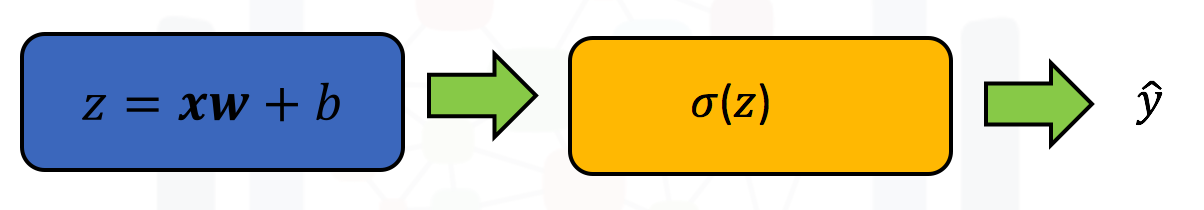

In [ ]:
# Generarea modelului regresiei logistice
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())

print(model.state_dict())

# Generarea unor valori de intrare
x = torch.tensor([[1.]])

X = torch.tensor([[-10.],[0.], [1.]])

yhat = model(x)
YHAT = model(X)

print('Predicția pentru prima variabilă de intrare:', yhat)
print('Predicția pentru a doua varibilă de intrare:', YHAT)

## Crearea unui model al regresiei logistice folosind nn.Module

In [ ]:
# Definirea modelului

class logistic_regression(nn.Module):
  def __init__(self, input_size):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(input_size,1)

  def forward(self, x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat

model_LG = logistic_regression(1)

yhat = model_LG(x)
YHAT = model_LG(X)

print('Predicția pentru prima variabilă de intrare:', yhat)
print('Predicția pentru a doua varibilă de intrare:', YHAT)

# Exercițiu

Definiți o funcție pentru antrenarea modelului regresiei logistice. Antrenați modelul folosind 100 de iterații și afișați costul acesteia pe parcursul celor 100 de iterații. Adăugați o funcție de threshold modelului (daca predicția este mai mare sau egală cu 0.5, variabila de ieșire va fi 1, daca predicția este mai mică decât 0.5, variabila de ieșire este 0).


In [ ]:
# Crearea unui set de date de antrenare
class Data_LGR(Dataset):
  def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len 

data_lgr = Data_LGR()

# Crearea modelului regresiei logistice
class logistic_regression(nn.Module):
  def __init__(self, input_size):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(input_size, 1)

  def forward(self, x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat

model = logistic_regression(1)

# Definirea obiectului necesar optimizarii
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Definirea functiei cost
criterion = nn.BCELoss()

# Definirea unei liste unde va fi stocat costul
LOSS = []

def train_lgr(epochs):
  for epoch in range(epochs):
    yhat = model(data_lgr.x)

    loss = criterion(yhat, data_lgr.y)
    LOSS.append(loss.item())


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

train_lgr(1000)

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(len(LOSS)), np.ravel(np.array([LOSS])))

# Calculati acuratetea modelului
YHAT = model(data_lgr.x)
label = YHAT > 0.5
print("Acuratete: ", torch.mean((label == data_lgr.y.type(torch.ByteTensor)).type(torch.float)))